In [1]:
import pandas as pd
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
# submit=pd.read_csv("data/sample_subnisstion.csv")

#  1.데이터 확인 

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(train.shape)
print(train.info())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.isnull().sum()/train.shape[0] #열 별 NAN의 갯수/ 전체 행의 갯수 =각 열별 결측치의 비율

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

# 2.시각화 
## 생존 여부에 대한 분포를 확인 


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train['Survived'].value_counts() #생존,사망자 수 출력 (값들의 갯수를 출력하는 함수

0    549
1    342
Name: Survived, dtype: int64

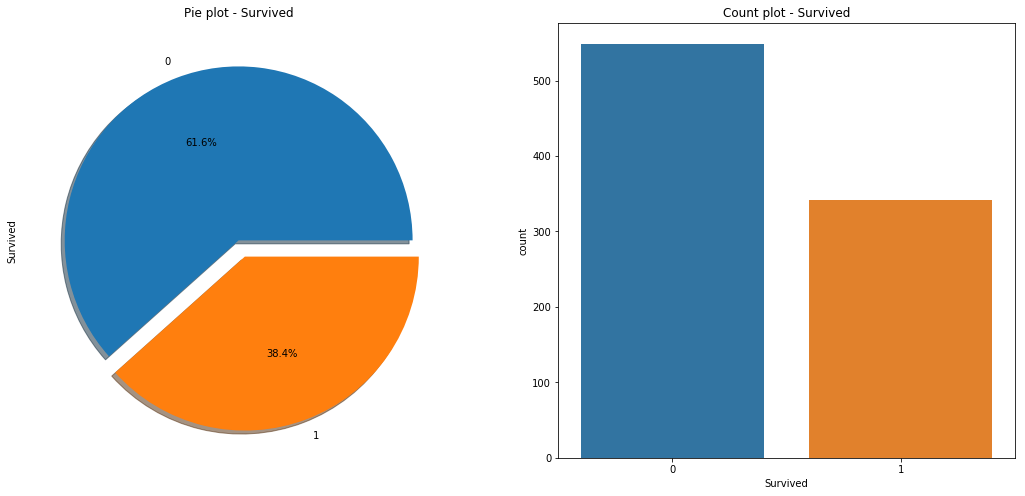

In [8]:
fig,ax = plt.subplots(1,2,figsize=(18,8))

train['Survived'].value_counts().plot.pie(ax=ax[0], autopct='%.1f%%', explode=[0,0.1],shadow=True)
ax[0].set_title("Pie plot - Survived")

sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

          female  male
Survived     233   109
Dead          81   468
            1   2    3
Survived  136  87  119
Dead       80  97  372


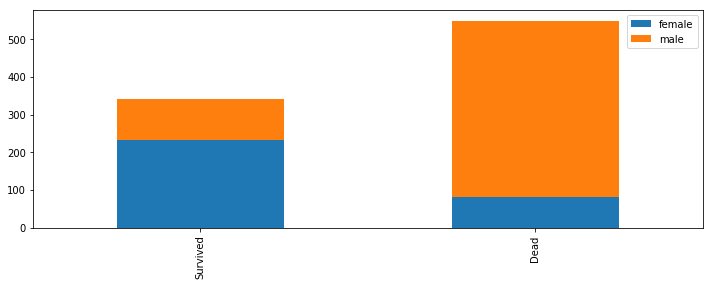

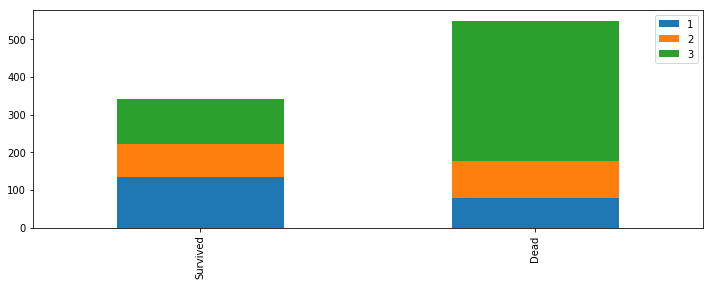

In [9]:
def survived_bar_chart(feature): #feature(요소)에 따른 생존여부를 시각화
    
    survived=train[train['Survived']==1][feature].value_counts() 
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    print(df)
    df.plot(kind='bar',stacked=True,figsize=(12,4))
    
survived_bar_chart('Sex')
survived_bar_chart('Pclass')


# 가로를 male, female로 방향으로 출력해보기!!!!!!!!!!!!!!!!!!!!!

In [10]:
print(train[['Pclass','Survived']].groupby('Pclass').count()) # Pclass 별로 Survived 값들의 갯수의 합
train[['Pclass','Survived']].groupby('Pclass').sum() # Pclass 별로 Survived 값들의 총합 
print(train[['Pclass','Survived']].groupby('Pclass').mean())

pd.crosstab(train['Pclass'],train['Survived'],margins=True)
# print(pd.crosstab(train['Pclass'],train['Survived'],margins=True))

        Survived
Pclass          
1            216
2            184
3            491
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


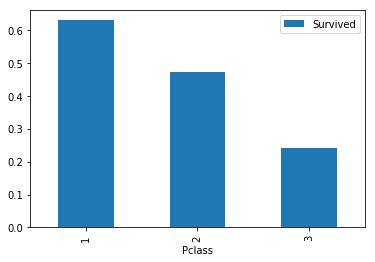

In [11]:
#등급별 생존률을 시각화

train[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()

C:\Users\B-11\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\B-11\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


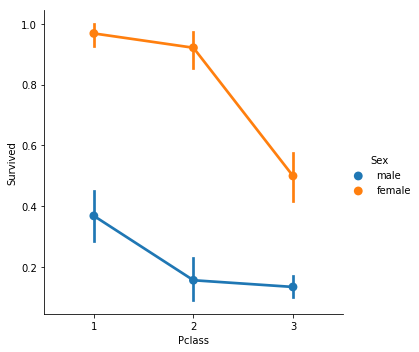

In [12]:
sns.factorplot('Pclass','Survived', data=train, hue='Sex', size=5)

            S   C   Q
Survived  217  93  30
Dead      427  75  47


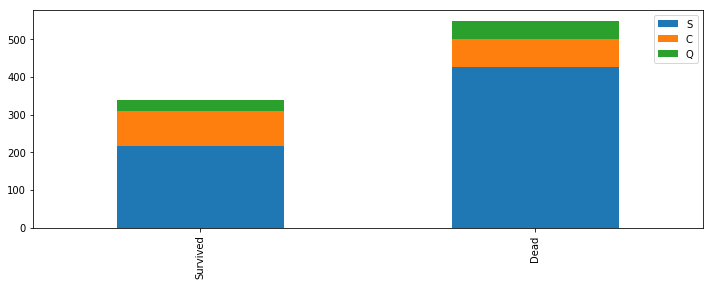

In [13]:
survived_bar_chart('Embarked')

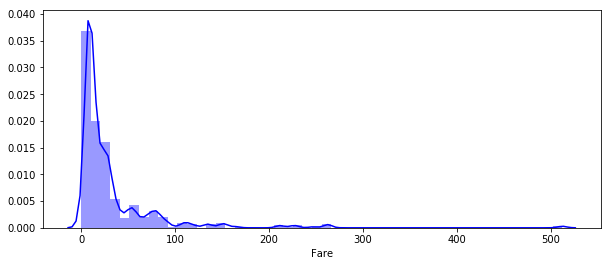

In [14]:
fig, ax= plt.subplots(1,1, figsize=(10,4))
sns.distplot(train['Fare'], ax=ax, color='b')

# 3.데이터전처리

In [15]:
#cabin은 난이 많으므로 모델에 포함할지 말지를 고민
train['Cabin'].isnull().sum()/train.shape[0]   #비율 -> 모델에서 제외

0.7710437710437711

In [16]:
train['Ticket'].value_counts()

#Ticket 걸럼에 대한 것은 더 고민필요, 어떻게 변형시켜 사용할 것인지!!!!!!!!!!!!

347082               7
1601                 7
CA. 2343             7
3101295              6
CA 2144              6
347088               6
382652               5
S.O.C. 14879         5
347077               4
349909               4
W./C. 6608           4
LINE                 4
2666                 4
113760               4
17421                4
19950                4
113781               4
4133                 4
PC 17757             4
345773               3
35273                3
239853               3
347742               3
13502                3
363291               3
29106                3
230080               3
PC 17760             3
248727               3
110413               3
                    ..
2686                 1
350406               1
312992               1
349225               1
374910               1
PC 17482             1
C.A. 24579           1
220367               1
27042                1
3460                 1
229236               1
248698               1
17466      

In [17]:
train_test_data=[train, test]

for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)')

# print(dataset.Title)
# print(train.Title)
dataset.head()

#주어진 문자열에서 숫자문자를 추출 한 수 정수타입으로 변환
# dataset['열이름'].str.extract('조건')astype(int)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [18]:
#정규표현식
import re 
# p=re.compile("[a-z]+")
# p.match('test')
# p.search("test")


p=re.compile("([a-zA-Z]+), ([A-Z]+[a-z]+). ([a-zA-Z]*)")

for dataset in train_test_data:
    for names in dataset['Name']:
        m=p.search(names)
        print(m.group(2))


Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Master
Mrs
Mrs
Miss
Miss
Mr
Mr
Miss
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Don
Mrs
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Miss
Mrs
Mrs
Mr
Miss
Miss
Mr
Mr
Miss
Mr
Mrs
Master
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Miss
Master
Mr
Miss
Mr
Master
Mr
Master
Mrs
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mrs
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Mr
Master
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Mrs
Mr
Mr
Miss
Mr
Mr
Mr
Mrs
Miss
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Rev
Rev
Mrs
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Master
Mr
Mrs
Mr
Mr
Master
Master
Mrs
Mrs
Mr
Mr
Mr
Master
Miss
Mr
Mr
Mr
Master
Miss
Mr
Mr
Miss
Mr
Master
Master
Miss
Mr
Mrs
Mr
Mr
Mr
Mrs
Mr
Miss
Master
Mrs
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Miss
Mr
Mr
Mr
Miss
Miss
Mr
Miss
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Mr
Miss
Mrs
Mr
Mr
Miss
Mr
Miss
Mr
Miss
Mr
Mr
Miss
Miss
Mr
Mr
Mr
Dr
Miss
Mrs
Mr
Rev
Mr
Mrs
Mr
Mr
Mrs
Mrs
Mrs
Miss
Miss
Mrs
M

AttributeError: 'NoneType' object has no attribute 'group'

In [19]:
train['Title'].value_counts()
test['Title'].value_counts()

title_mapping={
    'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'y':3,'Planke':3,'Impe':3,'Mlle':3,'Gordon':3,
    'Col':3,'Major':3,'Pelsmaeker':3,'Jonkheer':3,'Cruyssen':3,'Walle':3,'Mme':3,'Carlo':3,'Ms':3,
    'Mulder':3,'Capt':3,'Steen':3,'Don':3,'Billiard':3,'Velde':3,'Shawah':3,'Messemaeker':3,
    'Melkebeke':3,'der':3,'the':3,}

for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


            0    1   2   3
Survived   79  126  97  40
Dead      423   53  24  49


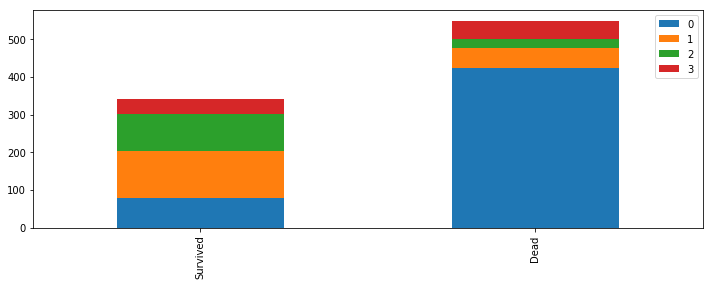

In [20]:
survived_bar_chart('Title')

In [21]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [22]:
sex_mapping={'male':0, 'female':1}

for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

In [23]:
test.head(100)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2.0
5,897,3,0,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,1,30.0,0,0,330972,7.6292,NaN,Q,1.0
7,899,2,0,26.0,1,1,248738,29.0000,NaN,S,0.0
8,900,3,1,18.0,0,0,2657,7.2292,NaN,C,2.0
9,901,3,0,21.0,2,0,A/4 48871,24.1500,NaN,S,0.0


In [24]:
train.groupby("Title")["Age"].median()  #호칭에 대한 나이의 중앙값

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True) #함수 값으로 일관 변화
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True) #함수 값으로 일관 변화

In [25]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          415 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


In [26]:
#test.groupby("Title")["Age"].median()  #호칭에 대한 나이의 중앙값
#test null값 채우기

test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True) #함수 값으로 일관 변화
test["Title"].fillna(test.groupby("Age")["Title"].transform("median"),inplace=True)
test["Fare"].fillna(test.groupby("Title")["Fare"].transform("median"),inplace=True)

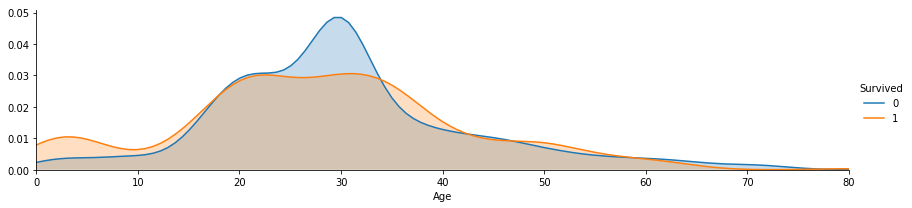

In [27]:
facet=sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

(0, 40)

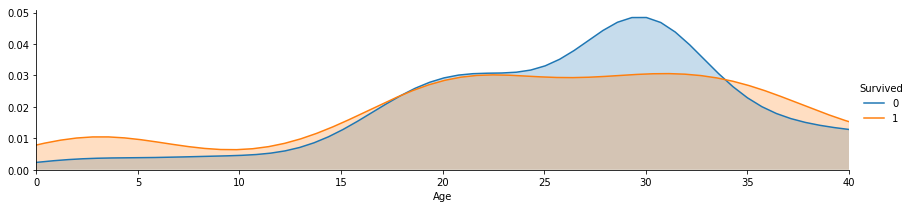

In [28]:
facet=sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,40)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [30]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=13,"Age"]=0,
    dataset.loc[(dataset['Age']>13) & (dataset['Age']<=19),"Age"]=1,
    dataset.loc[(dataset['Age']>19) & (dataset['Age']<=36),"Age"]=2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=61),"Age"]=3,
    dataset.loc[(dataset['Age']>61),"Age"]=4
train.Age.head()

0    2.0
1    3.0
2    2.0
3    2.0
4    2.0
Name: Age, dtype: float64

          0.0  1.0  2.0  3.0  4.0
Survived   42   40  188   67    5
Dead       29   60  337  109   14


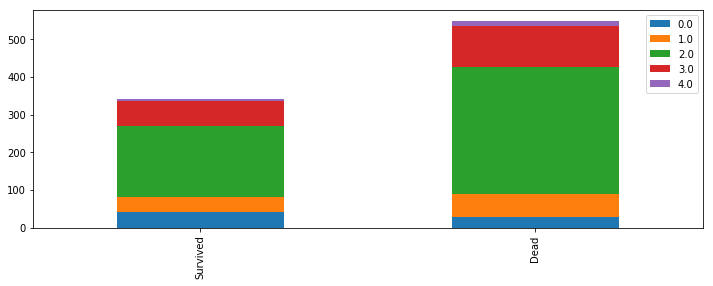

In [31]:
survived_bar_chart("Age")

In [32]:
#선실 등급별 항국의 합

Pclass1=train[train['Pclass']==1]['Embarked'].value_counts() #1들급실을 사용한 이용자들이 탑승한 항구 갯수 출력
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()

In [33]:
print(Pclass1)
print(Pclass2)
print(Pclass3)

S    127
C     85
Q      2
Name: Embarked, dtype: int64
S    164
C     17
Q      3
Name: Embarked, dtype: int64
S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [34]:
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2st class','3st class']
df

,S,C,Q
1st class,127,85,2
2st class,164,17,3
3st class,353,66,72


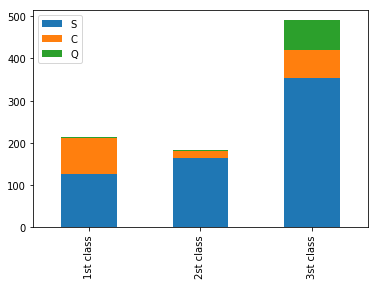

In [35]:
df.plot(kind='bar', stacked=True)

In [36]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [37]:
em={'S':0, "C":1, "Q":2 }
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(em)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


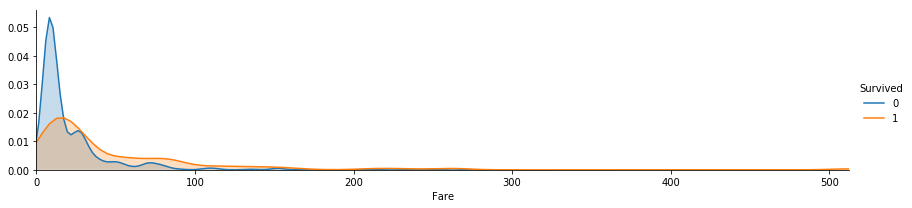

In [38]:
facet=sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
# plt.xlim(0,20)

In [39]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=20,"Fare"]=0,
    dataset.loc[(dataset['Fare']>20) & (dataset['Fare']<=30),"Fare"]=1,
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100),"Fare"]=2,
    dataset.loc[(dataset['Fare']>100),"Fare"]=3

In [40]:
train.Cabin.value_counts()

for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1] #첫글자만 추출
    
train[train['Pclass']==1]['Cabin'].value_counts() #등급에 대한 객실번호의 갯수 추출

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64

In [41]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts() 
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts() 
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts() 

In [42]:
print(Pclass1)
print(Pclass2)
print(Pclass3)

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64
F    8
E    4
D    4
Name: Cabin, dtype: int64
F    5
G    4
E    3
Name: Cabin, dtype: int64


In [43]:
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2st class','3st class']
df

,C,B,D,E,A,T,F,G
1st class,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2st class,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3st class,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


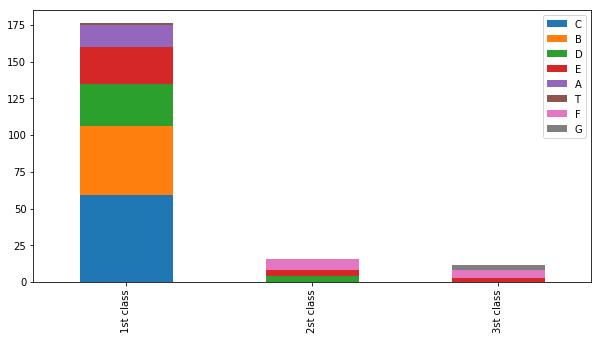

In [44]:
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [45]:
cabin_m={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.6}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_m)

In [46]:
train.Cabin.fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test.Cabin.fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 83.6+ KB


In [48]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=train['SibSp']+train['Parch']+1
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,2.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1


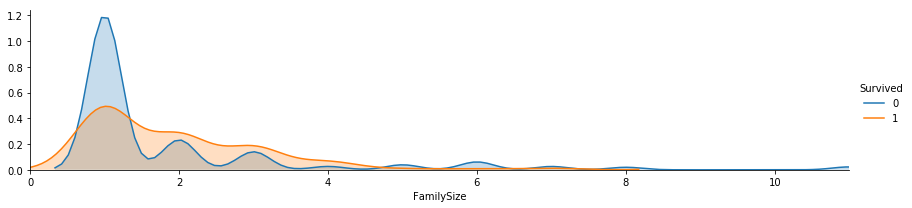

In [49]:
facet=sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

In [50]:
family_m={1:0, 2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.6,9:3.2,10:3.6,11:4.0}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_m)

In [51]:
train=train.drop(['Ticket','SibSp','Parch'], axis=1)
test=test.drop(['Ticket','SibSp','Parch'], axis=1)    

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,2.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,2.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0


In [53]:
test.head(100)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0.0,0.4
1,893,3,1,3.0,0.0,2.0,0,2.0,0.4
2,894,2,0,4.0,0.0,2.0,2,0.0,0.0
3,895,3,0,2.0,0.0,2.0,0,0.0,0.4
4,896,3,1,2.0,0.0,2.0,0,2.0,0.0
5,897,3,0,1.0,0.0,2.0,0,0.0,0.0
6,898,3,1,2.0,0.0,2.0,2,1.0,0.0
7,899,2,0,2.0,1.0,2.0,0,0.0,1.6
8,900,3,1,1.0,0.0,2.0,1,2.0,0.8
9,901,3,0,2.0,1.0,2.0,0,0.0,0.4


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
Title          891 non-null int64
FamilySize     891 non-null float64
dtypes: float64(4), int64(6)
memory usage: 69.7 KB


In [55]:
train_data=train.drop('Survived', axis=1)

In [56]:
target=train.Survived

In [57]:
train_data.shape

(891, 9)

In [58]:
type(target)

pandas.core.series.Series

In [59]:
train_data=train_data.drop('PassengerId',axis=1)

In [60]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,2.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [61]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [64]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,2.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,2.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0


In [65]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.019691,0.006488,-0.037264,-0.030467,0.002222,-0.040024
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.099095,0.282450,-0.279371,0.106811,0.396799,0.018427
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.275790,-0.700962,0.866035,0.045702,-0.134353,0.064762
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.083848,0.205338,-0.093081,0.116569,0.506396,0.202612
Age,0.019691,-0.099095,-0.275790,-0.083848,1.000000,0.051504,-0.241077,-0.003936,-0.221364,-0.305079
Fare,0.006488,0.282450,-0.700962,0.205338,0.051504,1.000000,-0.676861,-0.006517,0.235953,0.401813
Cabin,-0.037264,-0.279371,0.866035,-0.093081,-0.241077,-0.676861,1.000000,-0.041034,-0.119775,0.057062
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.003936,-0.006517,-0.041034,1.000000,0.038611,-0.079699
Title,0.002222,0.396799,-0.134353,0.506396,-0.221364,0.235953,-0.119775,0.038611,1.000000,0.339951
FamilySize,-0.040024,0.018427,0.064762,0.202612,-0.305079,0.401813,0.057062,-0.079699,0.339951,1.000000


# 4. 모델링

## 4.1 cross validation (classifier하기)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [68]:
k_fold=KFold(n_splits=10, shuffle=True, random_state=0) #random_state=0//random_seed와 같은 역할

## 4.1.1 Knn알고리즘

In [69]:
clf= KNeighborsClassifier(n_neighbors=13) # 가까이에 있는 13명을 보고 판단하기. ※ 짝수로 지정할 경우 동점이 나올 수 있음
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

[0.81111111 0.83146067 0.84269663 0.83146067 0.80898876 0.82022472
 0.82022472 0.79775281 0.84269663 0.86516854]
82.72


## 4.1.2Naive Bayes 알고리즘

In [ ]:
clf=GaussianNB()
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

In [ ]:
clf=KNeighborsClassifier(n_neighbors=13)
clf.fit(train_data, target)#모델을 만드는 함수
test_data=test.drop('PassengerId', axis=1).copy()
prediction=clf.predict(test_data)

In [ ]:
test_data.info()

In [ ]:
prediction

In [ ]:
submission=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':prediction
})

submission.head()

In [ ]:
submission.to_csv('submission.csv',index=False)
submission=pd.read_csv('submission.csv')
submission.head()

In [ ]:
clf=DecisionTreeClassifier()
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

In [ ]:
clf=RandomForestClassifier()
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

In [ ]:
clf=SVC()
score=cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1)
print(score)
print(round(np.mean(score)*100,2))

In [ ]:
clf.fit(train_data, target)
prediction=clf.predict(test_data)

submission=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':prediction
})

submission.to_csv('submission.csv',index=False)
submission=pd.read_csv('submission.csv')
submission.head()